## Data Set Information:

Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation.

A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification.

For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera.  

Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

## Attribute Information:

Bean Id (B): The counter of the rows

Area (A): The area of a bean zone and the number of pixels within its boundaries.

Perimeter (P): Bean circumference is defined as the length of its border.

Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.

Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.

Aspect ratio (K): Defines the relationship between L and l.

Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.

Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.

Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.

Extent (Ex): The ratio of the pixels in the bounding box to the bean area.

Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.

Roundness (R): Calculated with the following formula: (4piA)/(P^2)

Compactness (CO): Measures the roundness of an object: Ed/L

ShapeFactor1 (SF1)

ShapeFactor2 (SF2)

ShapeFactor3 (SF3)

ShapeFactor4 (SF4)

Class: (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

## IMPORT MODULES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# LOADING THE DATASET

In [2]:
df=pd.read_excel('Dry_Bean_Dataset.xlsx')
df = df.rename(columns={'roundness':'Roundness'}).drop("Bean ID",axis=1)
#so every column name will start with capital letters and drop the Bean ID,because no information of Bean ID is related

In [3]:
df.head()
#so we can observe the matrix

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
df.tail()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON
13610,42159,772.237,295.142741,182.204716,1.619841,0.786693,42600,231.686223,0.788962,0.989648,0.888380,0.784997,0.007001,0.001640,0.616221,0.998180,DERMASON


In [5]:
#to display descriptive statistics
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [6]:
#to show basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  Roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

All the features of our dataset are int or float except for Class,which is an object.

In [7]:
#to display number of samples on each class
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

# PREPROCESSING THE DATASET

In [8]:
#check for null values
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
Roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

No missing values.

# EXPLORATORY DATA ANALYSIS

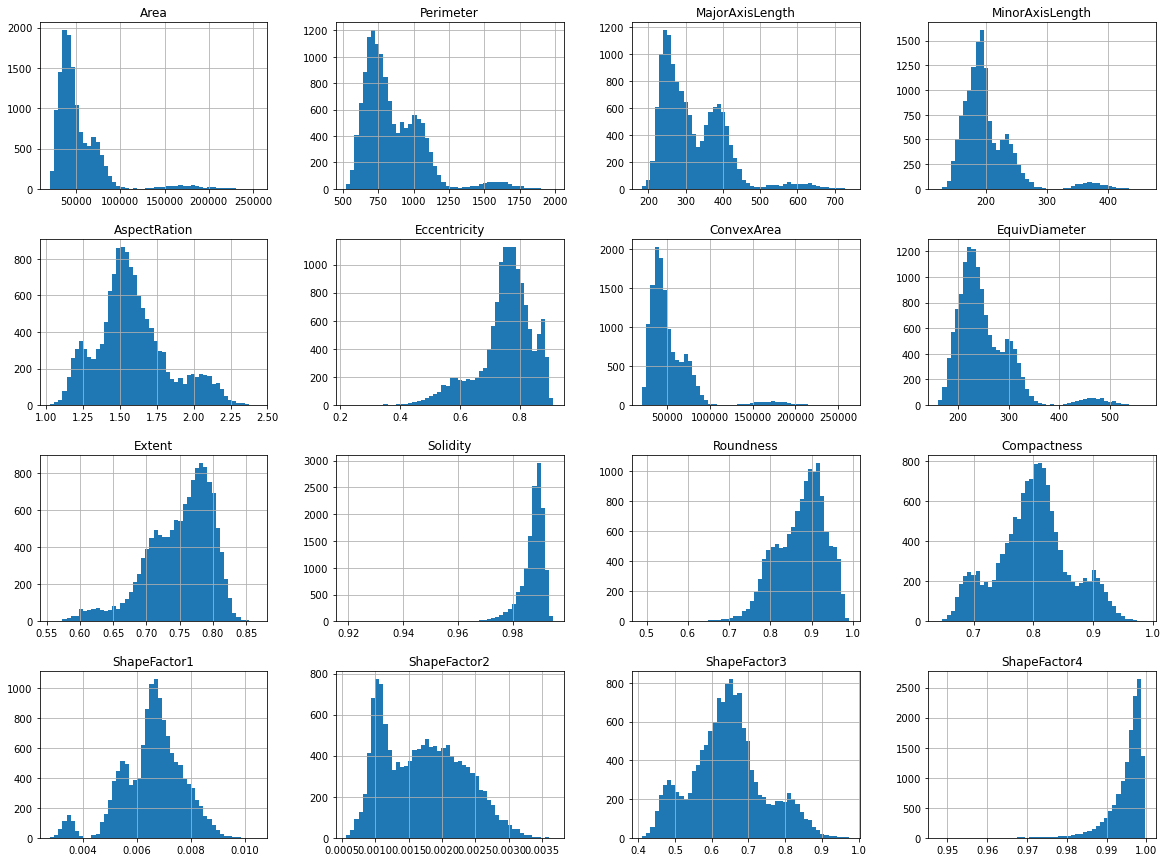

In [9]:
#histograms
df.hist(bins=50, figsize=(20,15))
plt.show()

As we can see the Compactness histogram resembles the standard deviation, ShapeFactor3 and AspectRation histogram.

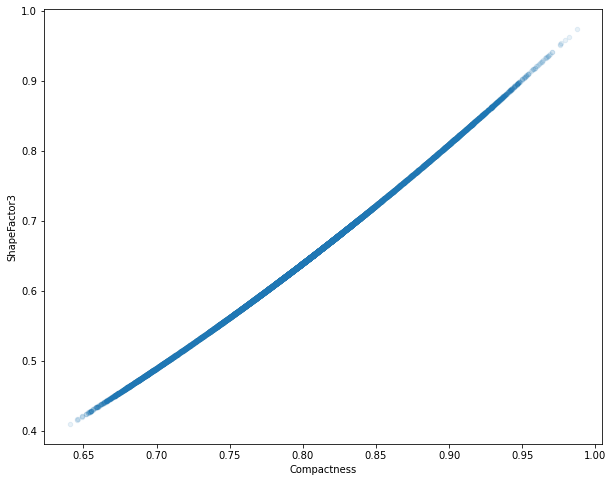

In [10]:
#scatterplot, 
df.plot(kind="scatter", x="Compactness", y="ShapeFactor3",figsize=(10,8),alpha=0.1);

ShapeFactor 3 is analogous to Compactness,
there are no outliers on this scatterplot which shows the strong correlation between ShapeFactor3 and Compactness.

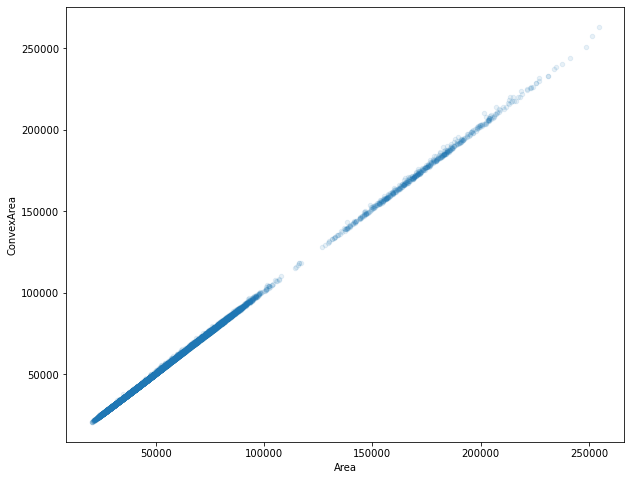

In [11]:
df.plot(kind="scatter", x="Area", y="ConvexArea",figsize=(10,8),alpha=0.1);

There are a few outliers on this graph,
again meaning there is a strong correlation between ConvexArea and Area and they both share more values < 100000.

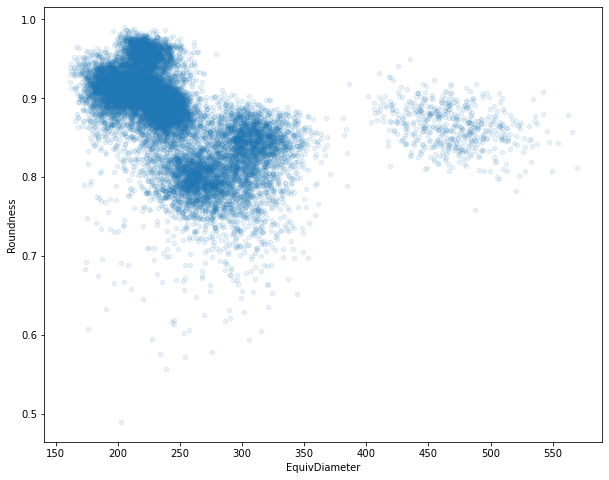

In [12]:
df.plot(kind="scatter", x="EquivDiameter", y="Roundness",figsize=(10,8),alpha=0.1);


The region Where Roundness is >0.8 and EquivDiameter is <350 is the most densly populated area in the graph.

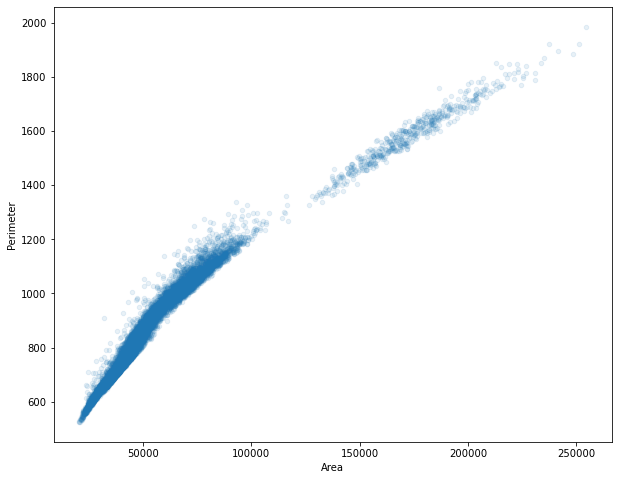

In [13]:
df.plot(kind="scatter", x="Area", y="Perimeter",figsize=(10,8),alpha=0.1);

More points lie in the region where area < 100000 and perimeter is <1200, there is a strong correlation between these values. 
Out with this region in the graph there is still a strong correlation between values however it is not as densly populated.  There are no major outlier on the graph.

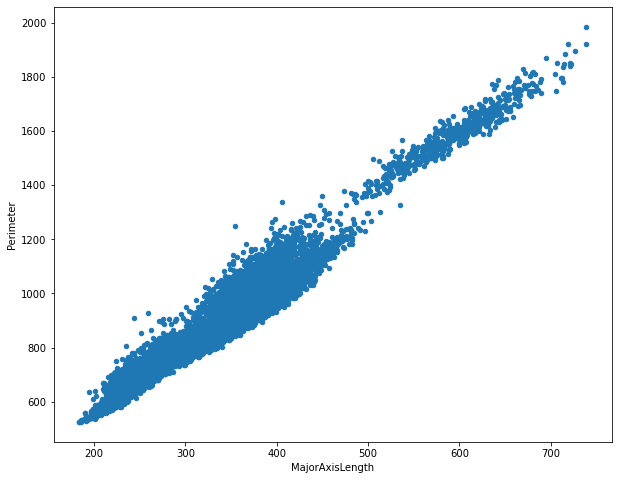

In [14]:
df.plot(kind="scatter", x="MajorAxisLength", y="Perimeter",figsize=(10,8));

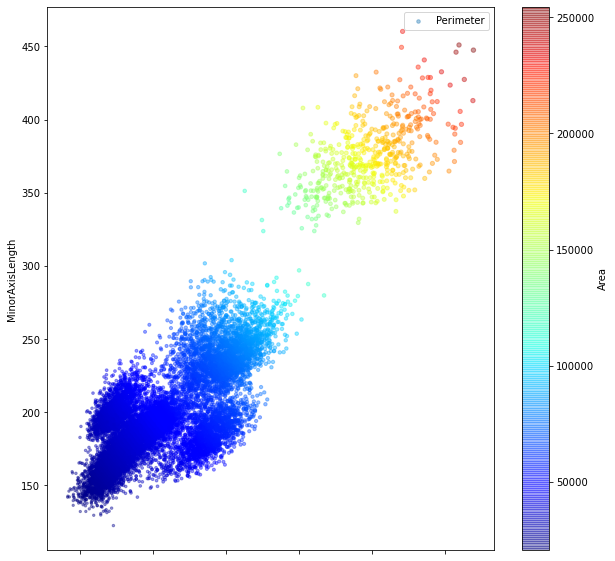

In [15]:
df.plot(kind="scatter", x="MajorAxisLength", y="MinorAxisLength", alpha=0.4,
    s=df["Perimeter"]/100, label="Perimeter", figsize=(10,10),
    c="Area", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend();

As the area is smaller the graph is more populated.
There is still a clear correlation between MinorAxisLength and MajorAxisLength however it is not as strong as previous graphs.
The correlation becomes less clear where there is a higher value for area, although it is still slighlty visible.

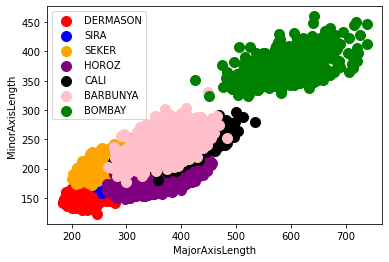

In [16]:
colors = ['red','blue','orange','purple','black','pink','green']
species= ['DERMASON','SIRA','SEKER','HOROZ','CALI','BARBUNYA','BOMBAY']
for i in range(7):
    x=df[df['Class'] == species[i]]
    plt.scatter(x['MajorAxisLength'],x['MinorAxisLength'], c=colors[i],label=species[i],s=100)
plt.xlabel("MajorAxisLength")
plt.ylabel("MinorAxisLength")
plt.legend();

As we can see the barbunya is quite similar to cali, and the sira is quite similar to dermanson,seker and horoz.
Bombay on the other hand is clusted far away from the other species.

The following is a correlation matrix where we are looking for the highest values to show strongest correlation

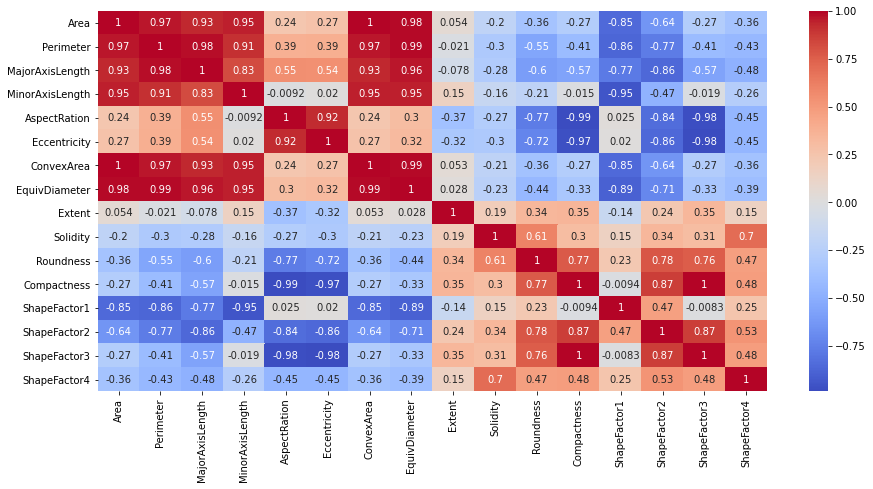

In [17]:
corr = df.corr()
fig, ax=plt.subplots(figsize=(15,7))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm');

The largest correlation is between Compactess and ShapeFactor3, and Area and ConvexArea where both are equal to 1.
The second highest correlation is between equivdiameter and perimeter and is equal to 99.
The third highest correlations are two the MajorAxislength with the Perimeter,and the Area with the Equivdiameter are equal to 98.

# LABEL ENCODER

In [18]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])
df.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,5
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,5
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,5
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,5
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,5


All Species converted to numbers.

In [19]:
df['Class'].value_counts()

3    3546
6    2636
5    2027
4    1928
2    1630
0    1322
1     522
Name: Class, dtype: int64

In [20]:
corr = df.corr()
corr["Class"].sort_values(ascending=False)

Class              1.000000
ShapeFactor1       0.391907
Roundness          0.384972
ShapeFactor2       0.335122
Solidity           0.321283
ShapeFactor3       0.167673
ShapeFactor4       0.165033
Compactness        0.156204
Extent            -0.031184
AspectRation      -0.116332
Eccentricity      -0.200356
MajorAxisLength   -0.455175
MinorAxisLength   -0.458492
Area              -0.475252
ConvexArea        -0.477459
EquivDiameter     -0.481099
Perimeter         -0.507638
Name: Class, dtype: float64

The above are used in the following new datasets.

In [21]:
dataset1=df[["ShapeFactor1","Roundness"]]
dataset2=df[["ShapeFactor1","Roundness","ShapeFactor2","Solidity","ShapeFactor3"]]
dataset3=df[["ShapeFactor1","Roundness","ShapeFactor2","Solidity","ShapeFactor3","ShapeFactor4","Compactness","Extent","AspectRation","Eccentricity"]]

I divided my data into 3 different data sets based on how related it is to the species.
Ιn the beginning I got the first 2 attributes, then the first 5 and then the first 10.

#  MODEL TRAINING

In [22]:
#for my original data

In [23]:
from sklearn.model_selection import train_test_split
# train-70% of the data
# test -30% of the data
X = df.drop(columns=['Class'])
Y = df['Class']
x_train, x_test, y_train,y_test=train_test_split(X,Y,test_size=.30)

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print(y_pred)

[4 5 3 ... 2 3 3]


We see some of the predictions.

In [25]:
from sklearn.metrics import confusion_matrix ,classification_report
cm=(np.array(confusion_matrix(y_test,y_pred)))
cm

array([[179,   0, 141,   0,  45,   0,  13],
       [  0, 155,   0,   0,   0,   0,   0],
       [ 78,   1, 379,   0,  17,   0,   4],
       [  0,   0,   0, 936,   0, 114,  66],
       [ 17,   0,  32,  12, 447,   0,  77],
       [  6,   0,   0,  95,   6, 436,  78],
       [  0,   0,   0,  24,  69,  62, 595]], dtype=int64)

From the matrix we perceive that the values of diagonal are the correct predicts
and the rest values of the matrix are the incorrects

We can also see that in the first row  the correct vaules are almost the same with the incorrects.
We can also see that in the second row there are only correct values.

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.47      0.54       378
           1       0.99      1.00      1.00       155
           2       0.69      0.79      0.74       479
           3       0.88      0.84      0.86      1116
           4       0.77      0.76      0.76       585
           5       0.71      0.70      0.71       621
           6       0.71      0.79      0.75       750

    accuracy                           0.77      4084
   macro avg       0.77      0.77      0.77      4084
weighted avg       0.77      0.77      0.76      4084



The Accuracy is equal to 77% and we can also see the precision,recall, f1-score and of BOMBAY(1) is equal to 1,which is the best score,because there are no incorrect values.

In the first row the percentages are low,because of the many incorrect values.

In [27]:
TP = np.diag(cm)
TP

array([179, 155, 379, 936, 447, 436, 595], dtype=int64)

True Positive values

In [28]:
FP = cm.sum(axis=0) - np.diag(cm)
FP

array([101,   1, 173, 131, 137, 176, 238], dtype=int64)

False Positive values

#### For my first dataset(dataset1)

In [29]:
A=dataset1
Y = df['Class']
a_train, a_test, y1_train, y1_test=train_test_split(A,Y,test_size=.30)

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb=GaussianNB()
gnb.fit(a_train,y1_train)
y_pred1=gnb.predict(a_test)
print(y_pred1)

[4 6 3 ... 4 2 6]


In [31]:
from sklearn.metrics import confusion_matrix ,classification_report
cm1=np.array(confusion_matrix(y1_test,y_pred1))
cm1

array([[225,   0, 153,   0,  25,   1,   3],
       [  0, 169,   0,   0,   0,   0,   0],
       [ 38,   0, 423,   0,  10,   0,   1],
       [  0,   0,   0, 889,  14,  30, 113],
       [ 10,   0,   5,   9, 567,   0,  11],
       [  3,   0,   8,   8,   6, 535,  39],
       [  0,   0,   3,  54,  12,  51, 669]], dtype=int64)

From the matrix we perceive that the values of diagonal are the correct predicts
and the rest values of the matrix are the incorrects.
Also can be noticed that in the first row there are still many incorrect values.

In [32]:
print(classification_report(y1_test,y_pred1))

              precision    recall  f1-score   support

           0       0.82      0.55      0.66       407
           1       1.00      1.00      1.00       169
           2       0.71      0.90      0.80       472
           3       0.93      0.85      0.89      1046
           4       0.89      0.94      0.92       602
           5       0.87      0.89      0.88       599
           6       0.80      0.85      0.82       789

    accuracy                           0.85      4084
   macro avg       0.86      0.85      0.85      4084
weighted avg       0.86      0.85      0.85      4084



The accuracy  is higher than my normal data(85%),because only positive correlations were used.In my normal data I have
9 negative correlations and 7 positive.Here I have only 2 positives.
We can also see the precision,recall, f1-score and of BOMBAY(1) is equal to 1,which is the best score,because there are no incorrect values.

In [33]:
FP = cm1.sum(axis=0) - np.diag(cm1)
FP

array([ 51,   0, 169,  71,  67,  82, 167], dtype=int64)

False Positive values

In [34]:
TP = np.diag(cm1)
TP

array([225, 169, 423, 889, 567, 535, 669], dtype=int64)

True Positive values

### For my second dataset2

In [35]:
B=dataset2
Y = df['Class']
b_train, b_test, y2_train, y2_test=train_test_split(B,Y,test_size=.30)

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb=GaussianNB()
gnb.fit(b_train,y2_train)
y_pred2=gnb.predict(b_test)
print(y_pred2)


[3 6 5 ... 0 6 3]


In [37]:
from sklearn.metrics import confusion_matrix ,classification_report
cm2=np.array(confusion_matrix(y2_test,y_pred2))
cm2

array([[352,   0,  51,   0,   6,   2,  11],
       [  0, 146,   0,   0,   0,   0,   0],
       [ 20,   0, 454,   0,  16,   1,   8],
       [  3,   0,   0, 943,   1,  16, 103],
       [  2,   0,   9,   4, 556,   0,   9],
       [  6,   0,   0,  25,   0, 565,  17],
       [ 10,   0,   4,  64,  13,  11, 656]], dtype=int64)

From the matrix we perceive that the values of diagonal are the correct predicts
and the rest values of the matrix are the incorrects.
Also can be noticed that in the first row the incorrects values have been discreased and
in the second row we have only one incorrect value.

In [38]:
print(classification_report(y2_test,y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       422
           1       1.00      1.00      1.00       146
           2       0.88      0.91      0.89       499
           3       0.91      0.88      0.90      1066
           4       0.94      0.96      0.95       580
           5       0.95      0.92      0.94       613
           6       0.82      0.87      0.84       758

    accuracy                           0.90      4084
   macro avg       0.91      0.91      0.91      4084
weighted avg       0.90      0.90      0.90      4084



The accuracy is the highest in my second dataset,because more positive attirbutes were used and no negatives.

We can also see the precision, f1-score and of BOMBAY(1) is equal to 1,which is the best score,because there is only one incorrect value and recall is equal to 99%.

In [39]:
FP = cm2.sum(axis=0) - np.diag(cm2)
FP

array([ 41,   0,  64,  93,  36,  30, 148], dtype=int64)

False Positive values

In [40]:
TP = np.diag(cm2)
TP

array([352, 146, 454, 943, 556, 565, 656], dtype=int64)

True Positive values

### For my third dataset3

In [41]:
C=dataset3
Y = df['Class']
c_train, c_test, y3_train, y3_test=train_test_split(C,Y,test_size=.30)

In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb=GaussianNB()
gnb.fit(c_train,y3_train)
y_pred3=gnb.predict(c_test)
print(y_pred3)

[4 4 2 ... 5 1 5]


In [43]:
from sklearn.metrics import confusion_matrix ,classification_report
cm3=np.array(confusion_matrix(y3_test,y_pred3))
cm3

array([[318,   0,  50,   1,   3,  13,  10],
       [  2, 153,   0,   0,   0,   0,   0],
       [ 19,   0, 445,   1,  18,   0,   7],
       [  8,   0,   0, 885,   4,  45, 107],
       [  0,   0,  21,   0, 577,   0,   7],
       [  3,   0,   0,  35,   0, 571,   7],
       [  5,   0,  25, 128,  19,   5, 592]], dtype=int64)

From the matrix we perceive that the values of diagonal are the correct predicts
and the rest values of the matrix are the incorrects.
The most incorrect values are in the last row.

In [44]:
print(classification_report(y3_test,y_pred3))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       395
           1       1.00      0.99      0.99       155
           2       0.82      0.91      0.86       490
           3       0.84      0.84      0.84      1049
           4       0.93      0.95      0.94       605
           5       0.90      0.93      0.91       616
           6       0.81      0.76      0.79       774

    accuracy                           0.87      4084
   macro avg       0.89      0.88      0.88      4084
weighted avg       0.87      0.87      0.87      4084



The accuracy is 87%,which is higher than my normal data,because less negative attributes were used.
It is also lower than my second dataset,because my second dataset has only positive attributes and no negatives.

The last row has the lowest percentage,because it has also the most incorrect values.

In [45]:
FP = cm3.sum(axis=0) - np.diag(cm3)
FP

array([ 37,   0,  96, 165,  44,  63, 138], dtype=int64)

False Positive values

In [46]:
TP = np.diag(cm3)
TP

array([318, 153, 445, 885, 577, 571, 592], dtype=int64)

True Positive values

So the best model is in dataset2,because it has the highest accuracy and has not negative correlated attributes with the Class.
The second is in dataset3,because it has  7 positive and 3 negative correlated attributes with the Class.
The third is in dataset1,which has only 2 positive correlated attibutes with the Class.
The last one is in normal dataset,which has 7 positive and 9 negative correlated attributes with the Class.

In [47]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
print(model.score(x_test, y_test))

0.8937316356513222


In [48]:
#knn k nearest
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train, y_train)
print(model.score(x_test, y_test))


0.722820763956905
